# Analysis and Forecast of Electricity Generation in Colombia's National Interconnected System (SIN)

# Table of Contents

1. [Introduction](#introduction)
    - [Study Context](#study-context)
    - [Analysis Objectives](#analysis-objectives)
1. [Data Description](#data-description)
    - [Data Source](#data-source)
    - [Dataset Contents](#dataset-contents)
    - [Relevant Variables](#relevant-variables)
1. [Data Loading and Exploration](#data-loading-and-exploration)
    - [Importing Necessary Libraries](#importing-necessary-libraries)
    - [Loading the Data](#loading-the-data)
    - [Initial Data Exploration](#initial-data-exploration)
1. [Data Integration](#data-integration)
    - [Normalization of DataFrame Columns](#normalization-of-dataframe-columns)
    - [Merge of the dataframes](#merge-of-the-dataframes)
1. [Data Preparation and Cleaning](#data-preparation-and-cleaning)
    - [Data Integrity Verification](#data-integrity-verification)
    - [Handling Missing and Duplicate Values](#handling-missing-and-duplicate-values)
    - [Necessary Transformations](#necessary-transformations)
1. [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Distribution by Generation Type](#distribution-by-generation-type)
    - [Comparison between Generation Types](#comparison-between-generation-types)
    - [Historical Trends in Electricity Generation](#historical-trends-in-electricity-generation)
1. [Comparation Between Types of Generation](#comparation-between-types-of-generation)
    - [Distribution of electric generation by type of generation](#distribution-of-electric-generation-by-type-of-generation)
        - [Analysis](#**analysis**)
1. [Regression Model](#regression-model)
    - [Linear Regression Model for Future Generation Prediction](#linear-regression-model-for-future-generation-prediction)
        - [Analysis](#**analysis**)
1. [Relationship Between El Niño and La Niña Episodes and Renewable Generation in Colombia](#relationship-between-el-niño-and-la-niña-episodes-and-renewable-generation-in-colombia)
    - [Renewable Generation by year](#renewable-generation-by-year)
        - [Analysis](#**analysis**)
    - [Renewable Generation by month](#renewable-generation-by-month)
        - [Analysis](#**analysis**)
1. [Power Bi Dashboard](#power-bi-dashboard)
    - [Data preparation for the power bi dashboard](#data-preparation-for-the-power-bi-dashboard)
1. [Conclusions](#conclusions)
1. [Summary of Key Findings](#summary-of-key-findings)
1. [Implications of the Study](#implications-of-the-study)

In [41]:
import nbformat

# Path to the current notebook
notebook_path = 'ElectricGeneration_colombia_with_TOC.ipynb'

# Load the notebook file
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Extract headers from the notebook cells
toc = ["# Table of Contents"]
for cell in nb.cells:
    if cell.cell_type == 'markdown':
        lines = cell.source.split('\n')
        for line in lines:
            if line.startswith('#'):
                level = line.count('#')
                title = line.strip('#').strip()
                link = title.replace(' ', '-').replace('`', '').lower()
                toc.append(f"{' ' * (level - 1) * 2}1. [{title}](#{link})")

# Generate the TOC cell and insert it at the beginning of the notebook
toc_cell = nbformat.v4.new_markdown_cell('\n'.join(toc))
nb.cells.insert(0, toc_cell)

# Save the modified notebook
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print('Table of Contents added to the notebook')


Table of Contents added to the notebook


# Introduction

## Study Context
Brief description of the context of electricity generation in Colombia.

## Analysis Objectives
Specific objectives to be achieved with this analysis.

# Data Description

## Data Source
This project utilizes hourly generation data from the National Interconnected System (SIN), spanning from 1995 to 2022. The data is categorized by generating plant and type of generation
Obtained from: [SINERGOX DATASET](https://sinergox.xm.com.co/oferta/Paginas/Historicos/Historicos.aspx?RootFolder=%2Foferta%2FHistricos%2FGeneraci%C3%B3n&FolderCTID=0x012000B3FC86CB37661147B52CAE93637C1249&View=%7B946210C0%2D4071%2D4173%2D964C%2DED5BCCE4E66C%7D)




## Dataset Contents
Details of what information is found in the dataset.



## Relevant Variables
List and description of the most important variables.

# Data Loading and Exploration



## Importing Necessary Libraries


In [ ]:
pip install unidecode


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline


## Loading the Data



In [36]:
dataframes=[]
df1=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1995.xlsx",header=2)
dataframes.append(df1)
#print(1)
df2=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1996.xlsx",header=0)
dataframes.append(df2)
#print(1)
df3=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1997.xlsx",header=1)
dataframes.append(df3)
#print(1)
df4=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1998.xlsx",header=1)
dataframes.append(df4)
#print(1)
df5=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1999.xlsx",header=1)
dataframes.append(df5)
#print(1)
df6=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2000.xlsx",header=2)
dataframes.append(df6)
#print(1)
df7=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2001.xlsx",header=1)
dataframes.append(df7)
#print(1)
df8=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2002.xlsx",header=1)
dataframes.append(df8)
#print(1)
df9=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2003.xlsx",header=2)
dataframes.append(df9)
#print(1)
df10=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2004.xlsx",header=1)
dataframes.append(df10)
#print(1)
df11=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2005.xlsx",header=1)
dataframes.append(df11)
#print(1)
df12=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2006.xlsx",header=2)
dataframes.append(df12)
#print(1)
df13=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2007.xlsx",header=2)
dataframes.append(df13)
#print(1)
df14=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2008.xlsx",header=2)
dataframes.append(df14)
#print(1)
df15=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2009.xlsx",header=2)
dataframes.append(df15)
#print(1)
df16=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2010.xlsx",header=2)
dataframes.append(df16)
#print(1)
df17=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2011.xlsx",header=2)
dataframes.append(df17)
#print(1)
df18=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2012.xlsx",header=2)
dataframes.append(df18)
#print(1)
df19=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2013.xlsx",header=2)
dataframes.append(df19)
#print(1)
df20=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2014.xlsx",header=2)
dataframes.append(df20)
#print(1)
df21=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2015.xlsx",header=2)
dataframes.append(df21)
#print(1)
df22=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2016.xlsx",header=2)
dataframes.append(df22)
#print(1)
df23=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2017 .xlsx",header=2)
dataframes.append(df23)
#print(1)
df24=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2018.xlsx",header=2)
dataframes.append(df24)
#print(1)
df25=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2019.xlsx",header=2)
dataframes.append(df25)
#print(1)
df26=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2020.xlsx",header=2)
dataframes.append(df26)
#print(1)
df27=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2021.xlsx",header=2)
dataframes.append(df27)
print(1)
df28=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2022.xlsx",header=2)
dataframes.append(df28)
#print(1)

              

1


## Initial Data Exploration

In [32]:
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            13804 non-null  datetime64[ns]
 1   Recurso          13804 non-null  object        
 2   Codigo Agente    13804 non-null  object        
 3   Tipo Generacion  13804 non-null  object        
 4   Tipo Despacho    13804 non-null  object        
 5   0                13804 non-null  int64         
 6   1                13804 non-null  int64         
 7   2                13804 non-null  int64         
 8   3                13804 non-null  int64         
 9   4                13804 non-null  int64         
 10  5                13804 non-null  int64         
 11  6                13804 non-null  int64         
 12  7                13804 non-null  int64         
 13  8                13804 non-null  int64         
 14  9                13804 non-null  int64

In [35]:
for i in range(len(dataframes)):
    print(dataframes[i].columns)

Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='objec

# Data Integration

### Normalization of DataFrame Columns
The column names of most dataframes are similar, but there are cases where some contain Spanish diacritical marks or numbers formatted as integers. Therefore, it is necessary to remove the diacritical marks (using the unidecode library) and convert all dataframe column names to strings.

In [5]:



# Make a copy of the dataframes list to avoid modifying the original data
dataframes1 = dataframes.copy()

def columnas(df):
    # Check if there is an integer in the column names
    if 0 in df.columns:
        # If there is an integer in the columns, first convert all the integers into strings
        keys = df.columns.tolist()  # Get a list of the current column names
        values = df.columns.astype(str)  # Convert the column names to strings
        dic = dict(zip(keys, values))  # Create a dictionary to map old column names to new string column names
        df.rename(columns=dic, inplace=True)  # Rename the columns using the dictionary

        # Remove diacritical marks from the column names
        keys1 = df.columns.tolist()  # Get the updated list of column names
        values2 = [unidecode(value) for value in df.columns.tolist()]  # Remove diacritical marks from the column names
        df.rename(columns=dict(zip(keys1, values2)), inplace=True)  # Rename the columns using the updated names
    else:
        # If there are no integers in the columns, just remove the diacritical marks from the column names
        values = df.columns.astype(str)  # Convert the column names to strings
        keys = df.columns.tolist()  # Get the list of current column names
        values = [unidecode(value) for value in df.columns.tolist()]  # Remove diacritical marks from the column names
        dic = dict(zip(keys, values))  # Create a dictionary to map old column names to new names without diacritical marks
        df.rename(columns=dic, inplace=True)  # Rename the columns using the dictionary

# Apply the column normalization function to each dataframe in the list
for i in range(len(dataframes1)):
    columnas(dataframes1[i])

# Display the columns of the 22nd dataframe to verify the changes
print("Before:",dataframes[4].columns)
print("After :",dataframes1[4].columns)


Before: Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
After : Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')


### Merge of the dataframes

In [6]:
# Merge of the dataframes


# Create an empty list to store common column names
common = []

# Identify common columns between the first two dataframes
for i in dataframes1[0].columns:
    if i in dataframes1[1].columns:
        common.append(i)

# Merge the first two dataframes on the common columns using an outer join
union = dataframes1[0].merge(dataframes1[1], how="outer", on=common)

# Loop through the remaining dataframes in the list and merge them with the union dataframe
for i in range(len(dataframes1)):
    if i < 2:
        # Skip the first two dataframes as they are already merged
        pass 
    else:
        # Reset the common list for the next iteration
        common = []
        
        # Identify common columns between the current union dataframe and the next dataframe in the list
        for b in union.columns:
            if b in dataframes1[i].columns:
                common.append(b)
        
        # Ensure the 'Fecha' column is in datetime format for both dataframes before merging
        union['Fecha'] = pd.to_datetime(union['Fecha'])
        dataframes1[i]['Fecha'] = pd.to_datetime(dataframes1[i]['Fecha'])
        
        # Merge the current union dataframe with the next dataframe in the list on the common columns using an outer join
        union = union.merge(dataframes1[i], how="outer", on=common)

# At this point, 'union' contains the merged data from all dataframes in 'dataframes1'


C:\Users\mateo\AppData\Local\Temp\ipykernel_1960\3196698782.py:33: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  union = union.merge(dataframes1[i], how="outer", on=common)


# Data Preparation and Cleaning


## Data Integrity Verification
Considering the key objectives of the project, data quality is crucial. Therefore, the types of generation will undergo through verification.

In [7]:
# Display the count of unique values in the "Tipo Generacion" column
print(union["Tipo Generacion"].value_counts())

Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13047
EOLICA           6687
Solar              14
Name: count, dtype: int64


There is a discrepancy in the categorization of solar power plants, so it will be corrected.



In [8]:
# Replace "Solar" with "SOLAR" in the "Tipo Generacion" column
union["Tipo Generacion"] = union["Tipo Generacion"].replace("Solar", "SOLAR")

# Display the count of unique values in the "Tipo Generacion" column after the replacement
print(union["Tipo Generacion"].value_counts())


Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13061
EOLICA           6687
Name: count, dtype: int64


The data for generation is in KWH. For the purpose of easier understanding, this will be transformed to GWH. Additionally, the dataframe will be reorganized.







In [9]:


# Calculate a new column "Total" that is the sum of all numeric columns for each row
union["Total"] = union.sum(numeric_only=True, axis=1)

# Rearrange the columns of the DataFrame 'union' selecting only the specified columns
union = union[['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho', 'Combustible', 'Version', 
               'Es Menor', 'Es Autogenerador', 'Codigo Recurso', 'Clasificacion', '0', '1', '2', '3', '4', '5', '6', 
               '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Total']]

# Convert numeric values from KWH to GWH by dividing each value by 1,000,000
for i in union.columns:
    try:
        # Try to apply the division only to numeric columns
        union[i] = union[i].apply(lambda x: x / 1000000)
    except:
        # If an error occurs (e.g., if the column is not numeric), skip to the next column
        pass

# Display the first few rows of the DataFrame to verify the changes
union.head()

,Fecha,Recurso,Codigo Agente,Tipo Generacion,Tipo Despacho,Combustible,Version,Es Menor,Es Autogenerador,Codigo Recurso,...,15,16,17,18,19,20,21,22,23,Total
0,1995-07-20,EL RIO 6,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00881,0.00881,0.00882,0.00882,0.00886,0.00887,0.00889,0.00892,0.00878,0.21302
1,1995-07-20,EL RIO 2,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,1995-07-20,LA UNION 3,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,1995-07-20,EL RIO 7,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00919,0.00926,0.00931,0.00932,0.00929,0.00924,0.00926,0.00935,0.00918,0.21973
4,1995-07-20,LA UNION 4,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000



## Handling Missing and Duplicate Values
Now the missing values for generation type will be adressed 


In [10]:
union.replace([np.inf, -np.inf], np.nan, inplace=True)


In [11]:


# Filter rows where "Tipo Generacion" column is NaN (missing)
missing_type_generation = union[union["Tipo Generacion"].isna()]

# Count the occurrences of each "Recurso" in rows where "Tipo Generacion" is missing
missing_type_generation = missing_type_generation["Recurso"].value_counts()

# Print the counts of missing "Tipo Generacion" values grouped by "Recurso"
print(missing_type_generation)


Recurso
COGENERADOR INGENIO    176
GUALANDAY              147
GUALANDAY 166            1
GUALANDAY 172            1
BARRANCA 157             1
                      ... 
BARRANCA 73              1
GUALANDAY 87             1
BARRANCA 72              1
GUALANDAY 86             1
GUALANDAY 129            1
Name: count, Length: 472, dtype: int64


The plant named "COGENERADOR INGENIO" is inferred to be a cogeneration plant from its name. Additionally, a brief search on Google confirms that the plant named "GUALANDAY" is/was a thermal plant. Therefore, these entries will be corrected accordingly. However, the types of the other plants cannot be determined, so they will be removed from the dataframe.

In [12]:
# Update "Tipo Generacion" values based on specific conditions
union.loc[union["Recurso"] == "COGENERADOR INGENIO", "Tipo Generacion"] = "COGENERADOR"
union.loc[union["Recurso"] == "GUALANDAY", "Tipo Generacion"] = "TERMICA"

# Drop rows where "Tipo Generacion" is NaN
union = union.dropna(subset=["Tipo Generacion"])


In [13]:
union['Tipo Despacho'].value_counts()

Tipo Despacho
NO DESPACHADO CENTRALMENTE    752382
DESPACHADO CENTRALMENTE       383942
DESPACHO CENTRALMENTE          36156
DESPACHADA CENTRALMENTE         1140
NO DESPACHO CENTRALMENTE         766
DESPCHO CENTRALMENTE             147
Name: count, dtype: int64

In [14]:
union.loc[union["Tipo Despacho"] == "DESPACHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPACHADA CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPCHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPACHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "NO DESPACHO CENTRALMENTE","Tipo Despacho"] = "NO DESPACHADO CENTRALMENTE"


In [15]:
union['Tipo Despacho'].value_counts()

Tipo Despacho
NO DESPACHADO CENTRALMENTE    753148
DESPACHADO CENTRALMENTE       421385
Name: count, dtype: int64

## Necessary Transformations

The forthcoming analysis and visualizations will focus on the total generation for each year, categorized by type of generation. Consequently, a new dataframe named "yearlygeneration" will be created for this purpose

In [16]:
# Group the DataFrame by 'Fecha' (yearly) and 'Tipo Generacion'
grouped = union.groupby([pd.Grouper(key='Fecha', freq='Y'), "Tipo Generacion"])

# Calculate the sum of numeric columns for each group
yearlygeneration = grouped.sum(numeric_only=True)

# Define a function to round the values and convert them to integers
def redondeo_(df, i):
    try:
        df[i] = df[i].apply(lambda x: round(x, 0))
        df[i] = df[i].apply(lambda x: int(x))
    except:
        pass

# Apply the rounding function to each column in the yearlygeneration DataFrame
for i in yearlygeneration.columns:
    redondeo_(yearlygeneration, i)

yearlygeneration=yearlygeneration.reset_index()

# Display the first few rows of the yearlygeneration DataFrame
yearlygeneration.head()


,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,Total
0,1995-12-31,HIDRAULICA,400,378,371,376,416,520,619,649,...,594,612,671,851,864,791,689,551,444,14537
1,1995-12-31,TERMICA,137,132,131,131,136,141,147,151,...,149,151,163,175,177,172,164,155,146,3611
2,1996-12-31,HIDRAULICA,964,919,900,910,1005,1243,1438,1514,...,1379,1401,1498,1906,2003,1844,1612,1296,1068,33947
3,1996-12-31,TERMICA,228,222,220,220,225,235,247,256,...,264,267,292,329,333,321,301,274,247,6302
4,1997-12-31,HIDRAULICA,818,774,753,763,851,1075,1249,1332,...,1238,1251,1347,1771,1873,1726,1482,1164,929,30275


# Exploratory Data Analysis



## Distribution by Generation Type
Distribution of different types of electricity generation.

## Comparison between Generation Types
Comparison of efficiency, cost, etc., between different generation methods.


## Historical Trends in Electricity Generation


In [17]:
# Convert the 'Fecha' column to just the year
try:
    yearlygeneration["Fecha"] = yearlygeneration["Fecha"].dt.year
except:
    pass

# Group by 'Fecha' and calculate the sum of numeric columns, then reset the index
data = yearlygeneration.groupby("Fecha").sum(numeric_only=True).reset_index()

# Plot the data using Plotly
fig = px.line(data, x='Fecha', y='Total', title='Evolution of Generation Between 1995 and 2022',
              labels={'Fecha': 'Years', 'Total': 'Generation (GWH)'}, markers=True)

# Update the trace marker color
fig.update_traces(marker=dict(color='#EBA02E'))

# Update layout properties
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat=".0f"),
    template='plotly_white',
    title=dict(font=dict(size=30), x=0.5, xanchor='center'),
    xaxis_title=dict(font=dict(size=15)),
    yaxis_title=dict(font=dict(size=15)),
    legend=dict(font=dict(size=12)),
    width=1400,
    height=550
)

# Show the plot
fig.show()

# Print the dataframe
data[['Fecha', 'Total']]


,Fecha,Total
0,1995,18148
1,1996,40249
2,1997,41768
3,1998,42422
4,1999,40514
5,2000,41277
6,2001,43048
7,2002,44734
8,2003,46735
9,2004,48563


# Comparation Between Types of Generation

## Distribution of electric generation by type of generation

In [ ]:

# Plot using Seaborn catplot
sns.catplot(data=yearlygeneration, kind="bar", x="Fecha", y="Total", hue="Tipo Generacion", height=6, aspect=2)

# Customize labels and title using matplotlib
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Yearly Distribution By Type of Generation", fontsize=15)

plt.show()


In [ ]:

plt.figure(figsize=(15, 20))  # Set the overall figure size

# Graph of Long-Term Trends in Thermal and Hydroelectric Energy Generation
plt.subplot(3, 1, 1)  # Create the first subplot
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="HIDRAULICA") | (yearlygeneration["Tipo Generacion"]=="TERMICA")], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Long-Term Trends in Thermal and Hydroelectric Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.grid(alpha=0.5)

# Graph of Long-Term Trends in Cogeneration, Solar, and Wind Energy Generation
plt.subplot(3, 1, 2)  # Create the second subplot
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="EOLICA") | (yearlygeneration["Tipo Generacion"]=="SOLAR") | (yearlygeneration["Tipo Generacion"]=="COGENERADOR") ], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Long-Term Trends in Cogeneration, Solar, and Wind Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Graph of Long-Term Distribution in Cogeneration, Solar, and Wind Energy Generation
plt.subplot(3, 1, 3)  # Create the third subplot
sns.barplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="EOLICA") | (yearlygeneration["Tipo Generacion"]=="SOLAR") | (yearlygeneration["Tipo Generacion"]=="COGENERADOR")], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Distribution in Cogeneration, Solar, and Wind Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

plt.show()  # Display the plot

### **Analysis**
1.  The electric  Generation of the country have been increasing in a linear way, therefore, the future generation can be predicted with linear regression models.
2. **Energy matrix of colombia**:The country's electricity generation is primarily dominated by hydro and thermal sources. Other forms of generation represent a minimal percentage in comparison, highlighting the country's reliance on these two main sources of energy to meet electrical demand.
1. **Hydro and Thermal Generation:** The second image clearly shows an inverse relationship between hydro and thermal energy generation. Specifically, thermal generation increases when hydro generation decreases, suggesting a compensatory mechanism to ensure a constant energy supply
2. **Exponential Growth in Solar Generation:** Since its introduction into the National Interconnected System (SIN) in 2017, solar energy generation has experienced exponential growth. This increase reflects both greater adoption of solar technologies and increasing investment in renewable energy sources, contributing significantly to the diversification of the energy matrix.

# Regression Model




## Linear Regression Model for Future Generation Prediction
Building and training the regression model.


In [18]:


# Initialize the Linear Regression model
temp_reg = LinearRegression()

# Fit the model to the data
temp_reg.fit(np.array(data["Fecha"]).reshape(-1, 1), np.array(data["Total"]).reshape(-1, 1))

# Predict the value for the year 2023
prediccion = temp_reg.predict(np.array(2023).reshape(1, -1)).item()

# Print the prediction for 2023
print(f"Prediction for 2023: {round(prediccion,2)} GWH")

# Plot the data using Plotly
fig = px.line(data, x='Fecha', y='Total', title='Evolution and Prediction of 2023 Generation ',
              labels={'Fecha': 'Years', 'Total': 'Generation (GWH)'}, markers=True)

# Update the trace marker color
fig.update_traces(marker=dict(color='#EBA02E'))

# Add the prediction point
fig.add_trace(go.Scatter(
    x=[2023], y=[prediccion],
    mode='markers', name='Prediction',
    marker=dict(color='red', size=10)
))

# Add the true value point
fig.add_trace(go.Scatter(
    x=[2023], y=[80687.35],
    mode='markers', name='True Value',
    marker=dict(color='green', size=10)
))

# Update the layout
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat=".0f"),
    template='plotly_white',
    title=dict(font=dict(size=20), x=0.5,  # Centrar el título
        xanchor='center',),
    xaxis_title=dict(font=dict(size=15)),
    yaxis_title=dict(font=dict(size=15)),
    legend=dict(font=dict(size=12)),width=1400,height=700
)

# Show the plot
fig.show()
print(f"The value predicted by the linear regression model is {round(prediccion,2)} GWh (shown in red on the graph), while the actual value is 80,687.35 GWh (shown in green).")
print(f"the difference between the predicted value and the true value is: {round((80687.35-prediccion)/80687.35*100,2)} %")


Prediction for 2023: 77291.76 GWH


The value predicted by the linear regression model is 77291.76 GWh (shown in red on the graph), while the actual value is 80,687.35 GWh (shown in green).
the difference between the predicted value and the true value is: 4.21 %


### **Analysis**

- The linear regresion model made with scikitlearn predict the value of the 2023 generation with a 96.8 of accuraccy, this confirms the liena evolution of the electric generation in colombia



# Relationship Between El Niño and La Niña Episodes and Renewable Generation in Colombia

## Renewable Generation by year

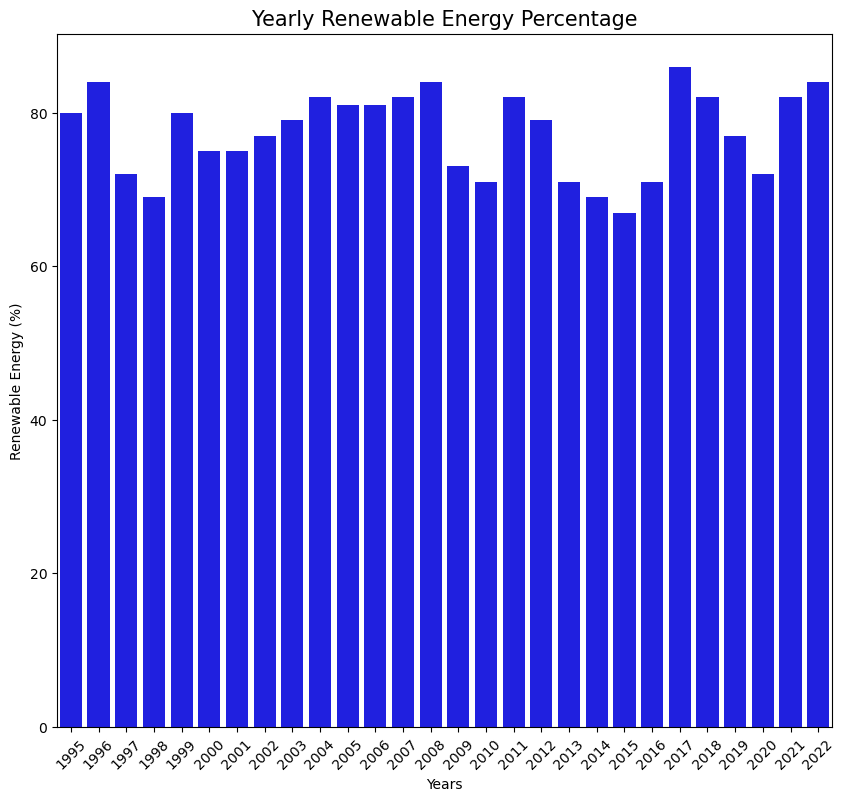

In [21]:
# Pivot the yearlygeneration DataFrame to have 'Fecha' as index, 'Tipo Generacion' as columns, and 'Total' as values
renewableyear = yearlygeneration.pivot(index="Fecha", columns='Tipo Generacion', values='Total')

# Replace NaN values with 0
renewableyear = renewableyear.replace(np.nan, 0)

# Calculate the total generation per year
renewableyear["Total"] = renewableyear.sum(numeric_only=True, axis=1)

# Calculate the percentage of renewable generation (EOLICA, HIDRAULICA, SOLAR) as part of total generation
renewableyear["Renovable(%)"] = round(renewableyear[["EOLICA", "HIDRAULICA", "SOLAR"]].sum(numeric_only=True, axis=1) / renewableyear["Total"] * 100, 2)

# Convert all columns to integers
for i in renewableyear.columns:
    renewableyear[i] = renewableyear[i].apply(lambda x: int(x))

renewableyear.reset_index(inplace=True)

# Plotting using Seaborn barplot
plt.figure(figsize=(10, 9))
sns.barplot(x="Fecha", y="Renovable(%)", data=renewableyear, color='blue')

# Customizing plot labels and title
plt.title("Yearly Renewable Energy Percentage", fontsize=15)
plt.ylabel("Renewable Energy (%)")
plt.xlabel("Years")
plt.xticks(rotation=45)  


plt.show()



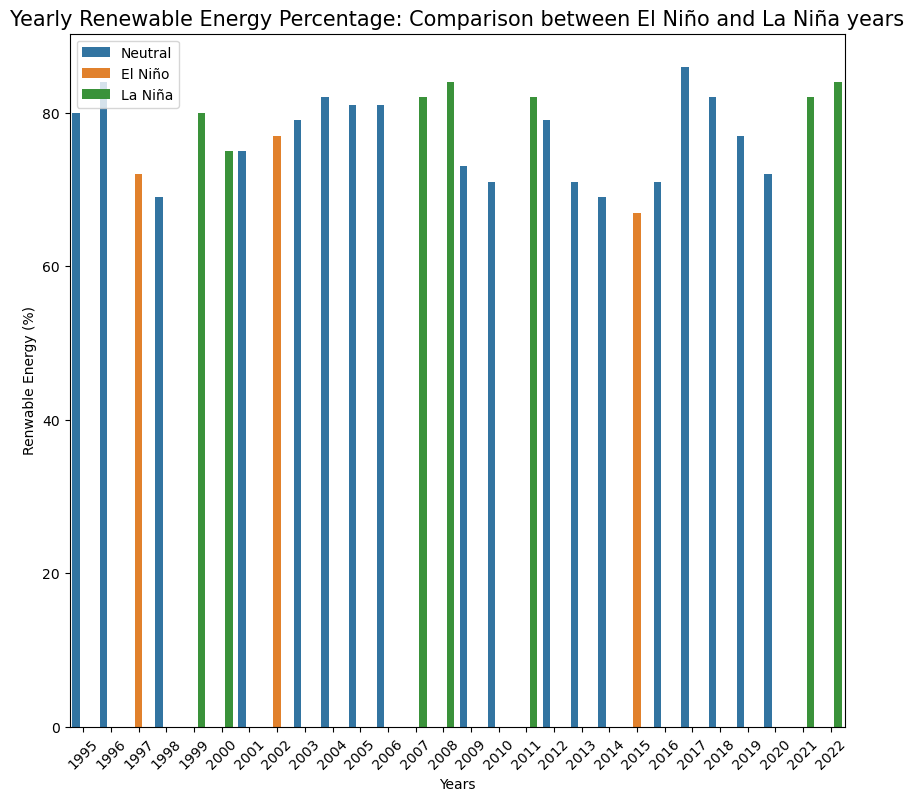

In [22]:


# URL of the ONI data
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'

# Read the data into a DataFrame
oni = pd.read_csv(url, delim_whitespace=True, header=0)

# Filter data for years >= 1995
oni = oni.loc[oni["YR"] >= 1995]

# Pivot the data to have 'YR' as index, 'MON' as columns, and 'ANOM' as values
oni = oni.pivot(index="YR", columns='MON', values='ANOM')

# Calculate the mean anomaly across months for each year
oni["Mean"] = oni.mean(numeric_only=True, axis=1)

# Categorize each year as El Niño, La Niña, or Neutral based on mean anomaly
oni["Niño/a"] = oni["Mean"].apply(lambda promedio: "El Niño" if promedio > 0.5 else "La Niña" if promedio < -0.5 else "Neutral")

# Reset index and rename 'YR' column to 'Fecha'
oni.reset_index(inplace=True)
oni.rename(columns={"YR": "Fecha"}, inplace=True)

# Selecting only the necessary columns from 'oni'
oni2 = oni[["Fecha", "Mean", "Niño/a"]]

# Performing an inner merge on 'Fecha' column
renewableyear_oni = renewableyear.merge(oni2, how="inner", on="Fecha")

# Displaying the first few rows of the merged DataFrame
renewableyear_oni.head()
#Ploting the Yearly Renewable Energy Percentage differenced by the niño/a conditions
plt.figure(figsize=(10,9))
sns.barplot(x="Fecha",y="Renovable(%)",hue="Niño/a",data=renewableyear_oni)
plt.title("Yearly Renewable Energy Percentage: Comparison between El Niño and La Niña years",fontsize=15)
plt.legend(loc="best")
plt.ylabel("Renwable Energy (%)")
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.show()


In [23]:

renewableyear_oni.to_csv("Renewable_year.csv")

### **Analysis**
- There is a noticeable pattern where La Niña years are associated with higher renewable energy generation. This suggests a potential positive impact of La Niña on renewable energy resources.
- El Niño years often show lower renewable energy generation, indicating a potential negative impact on renewable resources.
- The neutral years wide range of renewable generation percentages highlights that other climatic and non-climatic factors play significant roles in the the renewable generation of colombia.

## Renewable Generation by month

For the monthly analysis, it is necessary to group the generation by month using the union dataframe.

In [24]:
# Group the 'union' DataFrame by month ('Fecha' key with monthly frequency) and 'Tipo Generacion'
grouped = union.groupby([pd.Grouper(key='Fecha', freq='M'), "Tipo Generacion"])

# Sum the numeric values for each group
renewablemonth = grouped.sum(numeric_only=True)

# Apply the rounding function to all columns of the 'renewablemonth' DataFrame
for i in renewablemonth.columns:
    redondeo_(renewablemonth, i)

# Reset the index to turn 'Fecha' and 'Tipo Generacion' back into columns
renewablemonth.reset_index(inplace=True)

# Extract the month from the 'Fecha' column and create a new column 'Month'
renewablemonth["Month"] = renewablemonth["Fecha"].dt.month

# Pivot the 'renewablemonth' DataFrame to have 'Fecha' and 'Month' as the index,
# 'Tipo Generacion' as the columns, and 'Total' as the values
result3 = renewablemonth.pivot(index=["Fecha", "Month"], columns='Tipo Generacion', values='Total')

# Replace NaN values with 0
result3 = result3.replace(np.nan, 0)

# Calculate the sum of all generation types per month and add it as a new column 'Sum'
result3["Sum"] = result3[result3.columns].sum(numeric_only=True, axis=1)

# Calculate the percentage of renewable generation (EOLICA, HIDRAULICA, SOLAR) per month
result3["Renovable(%)"] = round(result3[["EOLICA", "HIDRAULICA", "SOLAR"]].sum(numeric_only=True, axis=1) / result3["Sum"] * 100, 2)

# Convert all columns to integers
for i in result3.columns:
    result3[i] = result3[i].apply(lambda x: int(x))

# Reset the index to turn 'Fecha' and 'Month' back into columns
result3.reset_index(inplace=True)

# Create a new column 'Fecha_merge' for merging, extracting the year from 'Fecha'
result3['Fecha_merge'] = result3["Fecha"].dt.year

# Display the first 10 rows of the 'result3' DataFrame
result3.head(10)

Tipo Generacion,Fecha,Month,COGENERADOR,EOLICA,HIDRAULICA,SOLAR,TERMICA,Sum,Renovable(%),Fecha_merge
0,1995-07-31,7,0,0,1051,0,229,1280,82,1995
1,1995-08-31,8,0,0,2781,0,575,3356,82,1995
2,1995-09-30,9,0,0,2651,0,671,3322,79,1995
3,1995-10-31,10,0,0,2804,0,635,3439,81,1995
4,1995-11-30,11,0,0,2719,0,654,3373,80,1995
5,1995-12-31,12,0,0,2530,0,848,3378,74,1995
6,1996-01-31,1,0,0,2449,0,853,3302,74,1996
7,1996-02-29,2,0,0,2717,0,506,3223,84,1996
8,1996-03-31,3,0,0,2968,0,469,3437,86,1996
9,1996-04-30,4,0,0,2874,0,405,3279,87,1996


In [25]:
# Define the URL for the ONI data
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'

# Read the ONI data from the URL using whitespace as the delimiter
oni = pd.read_csv(url, delim_whitespace=True, header=0)

# Filter the data to include only rows where the year (YR) is 1995 or later
oni = oni.loc[(oni["YR"] >= 1995)]

# Create a new column 'Niño/a' based on the 'ANOM' values
# If 'ANOM' is greater than 0.5, set it to "El Niño"
# If 'ANOM' is less than -0.5, set it to "La Niña"
# Otherwise, set it to "Neutral"
oni["Niño/a"] = oni["ANOM"].apply(lambda promedio: "El Niño" if promedio > 0.5 else "La Niña" if promedio < -0.5 else "Neutral")

# Rename columns 'YR' to 'Fecha_merge' and 'MON' to 'Month'
oni.rename(columns={"YR": "Fecha_merge", "MON": "Month"}, inplace=True)

# Display the first 15 rows of the 'oni' DataFrame
oni.head(15)



,Fecha_merge,Month,TOTAL,ClimAdjust,ANOM,Niño/a
540,1995,1,27.57,26.59,0.98,El Niño
541,1995,2,27.49,26.79,0.71,El Niño
542,1995,3,27.76,27.28,0.48,Neutral
543,1995,4,28.11,27.70,0.41,Neutral
544,1995,5,27.83,27.80,0.02,Neutral
545,1995,6,27.59,27.60,-0.01,Neutral
546,1995,7,27.08,27.19,-0.11,Neutral
547,1995,8,26.23,26.84,-0.61,La Niña
548,1995,9,25.88,26.78,-0.90,La Niña
549,1995,10,25.84,26.76,-0.92,La Niña


In [26]:
# Select relevant columns from the 'oni' DataFrame
oni2 = oni[["Fecha_merge", "Month", "ANOM", "Niño/a"]]

# Merge the 'result3' DataFrame with 'oni2' on 'Fecha_merge' and 'Month'
renewablemonth_oni = result3.merge(oni2, how="inner", on=["Fecha_merge", "Month"])

# Drop the 'Fecha_merge' column from the merged DataFrame
renewablemonth_oni = renewablemonth_oni.drop(columns="Fecha_merge")

# Save the 'renewablemonth_oni' DataFrame to a CSV file
renewablemonth_oni.to_csv("Renwable_month.csv")

# Display the last 15 rows of the 'renewablemonth_oni' DataFrame
renewablemonth_oni.tail(15)


,Fecha,Month,COGENERADOR,EOLICA,HIDRAULICA,SOLAR,TERMICA,Sum,Renovable(%),ANOM,Niño/a
315,2021-10-31,10,68,3,5599,31,920,6621,85,-0.94,La Niña
316,2021-11-30,11,55,3,5346,34,853,6291,85,-0.94,La Niña
317,2021-12-31,12,84,5,4835,36,1359,6319,77,-1.06,La Niña
318,2022-01-31,1,86,4,4788,38,1361,6277,76,-0.95,La Niña
319,2022-02-28,2,81,4,4376,32,1390,5883,75,-0.89,La Niña
320,2022-03-31,3,67,5,5395,35,965,6467,84,-0.97,La Niña
321,2022-04-30,4,55,4,5290,33,857,6239,85,-1.11,La Niña
322,2022-05-31,5,37,3,5600,31,885,6556,85,-1.11,La Niña
323,2022-06-30,6,50,4,5281,30,838,6203,85,-0.75,La Niña
324,2022-07-31,7,64,8,5523,40,927,6562,84,-0.70,La Niña


c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



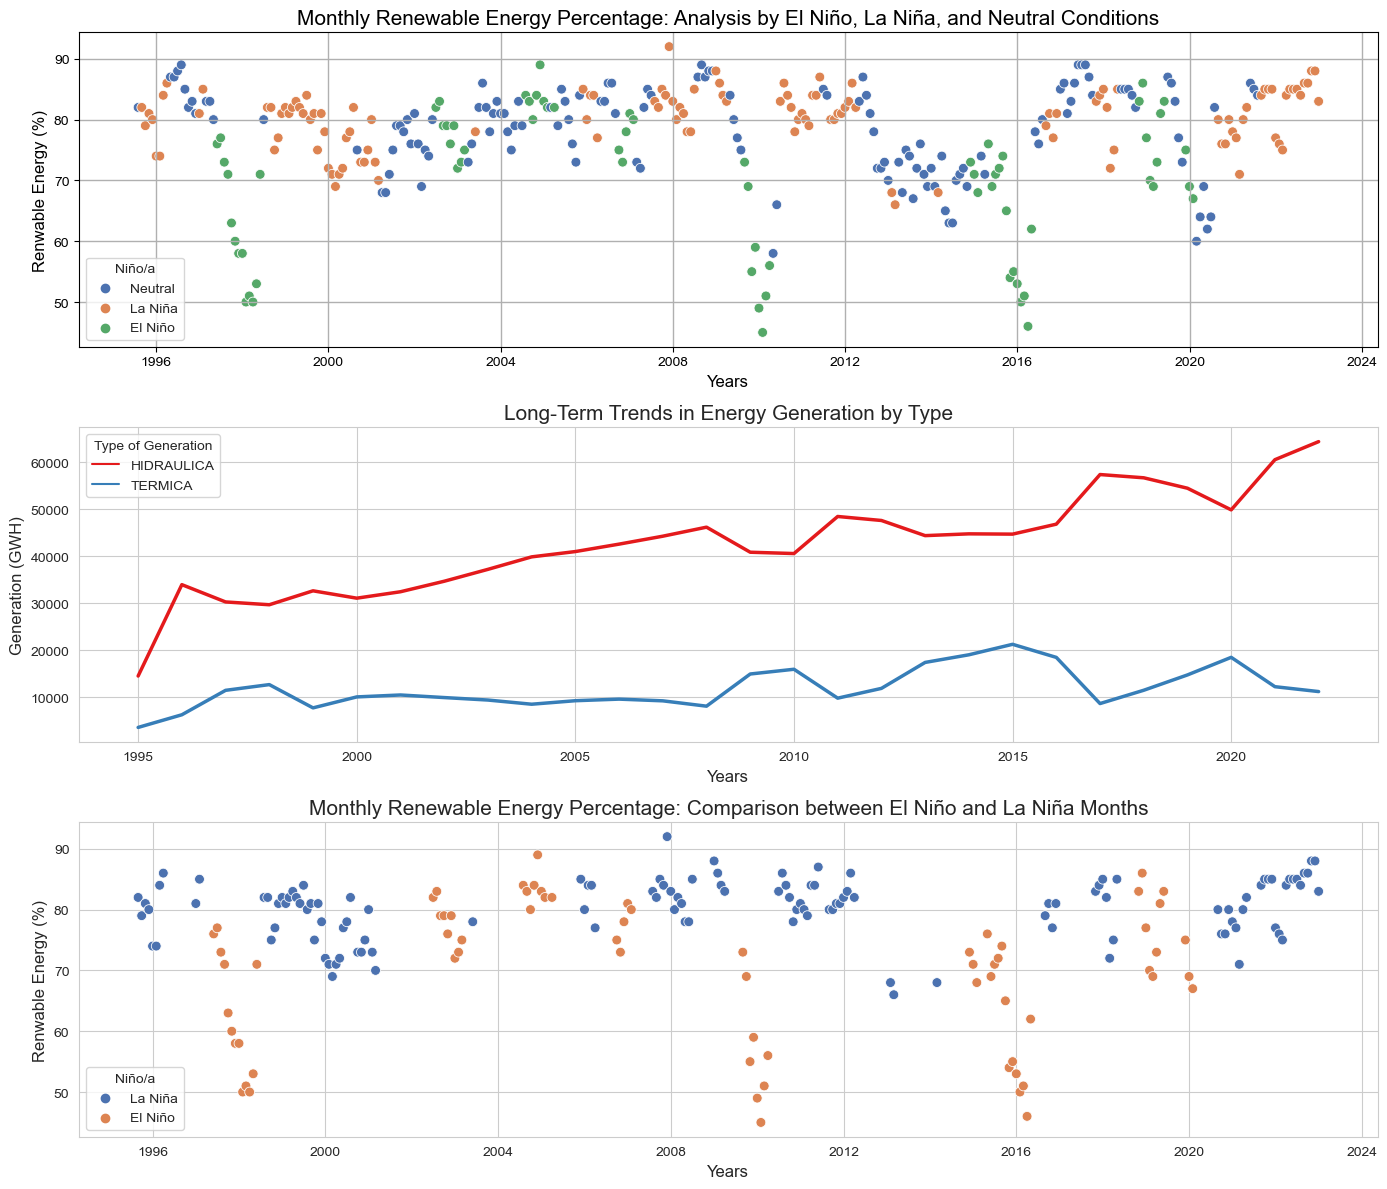

In [27]:


plt.figure(figsize=(14, 12))

# Subplot 1: % Renewable Energy vs Years with Niño/a categories
plt.subplot(3, 1, 1)
sns.set_style("whitegrid")
sns.scatterplot(x="Fecha", y="Renovable(%)", data=renewablemonth_oni, hue="Niño/a", palette="deep", s=50)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Renwable Energy (%)", fontsize=12)
plt.title("Monthly Renewable Energy Percentage: Analysis by El Niño, La Niña, and Neutral Conditions", fontsize=15)
plt.legend(title="Niño/a", loc='best', fontsize=10)
plt.grid( linestyle='-', linewidth=1)

# Subplot 2: Generation (GWH) vs Years by Tipo Generacion
plt.subplot(3, 1, 2)
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="HIDRAULICA") | (yearlygeneration["Tipo Generacion"]=="TERMICA")], hue="Tipo Generacion", palette="Set1", linewidth=2.5)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Long-Term Trends in Energy Generation by Type", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)

# Subplot 3: % Renewable Energy vs Years with El Niño and La Niña
plt.subplot(3, 1, 3)
sns.set_style("whitegrid")
sns.scatterplot(x="Fecha", y="Renovable(%)", data=renewablemonth_oni.loc[(renewablemonth_oni["Niño/a"]=="El Niño") | (renewablemonth_oni["Niño/a"]=="La Niña")], hue="Niño/a", palette="deep", s=50)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Renwable Energy (%)", fontsize=12)
plt.title("Monthly Renewable Energy Percentage: Comparison between El Niño and La Niña Months", fontsize=15)
plt.legend(title="Niño/a", loc='best', fontsize=10)

plt.tight_layout()
plt.show()


### **Analysis**
- The monthly analysis consistently reinforces the findings of the yearly analysis, highlighting a distinct pattern where La Niña months correlate with increased renewable energy generation. This pattern further solidifies the understanding that environmental factors, such as La Niña, play a significant role in shaping energy production trends in colombia 
- It's evident that during El Niño months, there is a notable decrease in the percentage of renewable energy generation. This observation aligns seamlessly with our earlier project analysis, where periods of El Niño often coincide with reduced hydroelectric output due to water scarcity. Consequently, thermal power plants step in to meet the energy demand vacuum left by hydroelectric limitations, further emphasizing the importance of understanding and adapting to climatic fluctuations in energy planning and management strategies.

# Power Bi Dashboard

## Data preparation for the power bi dashboard

In [28]:
# Using numpy
# Create a copy of the 'union' DataFrame
union_prueba = union.copy()

# Calculate the total sum of the 'Total' column once to avoid recalculating it in each iteration
total_sum = union_prueba["Total"].sum()

# Create a boolean mask for the conditions
mask = union_prueba["Tipo Generacion"].isin(['HIDRAULICA', 'EOLICA', 'SOLAR'])

# Calculate the 'Renovable' column based on the mask and divide by the total sum
union_prueba["Renovable"] = np.where(mask, union_prueba["Total"] / total_sum, 0)

# Calculate the 'NO Renovable' column for specific 'Tipo Generacion' values and divide by the total sum
union_prueba["NO Renovable"] = np.where(union_prueba["Tipo Generacion"].isin(['COGENERADOR', 'TERMICA']), union_prueba["Total"] / total_sum, 0)

# Calculate the 'Participacion %' column by dividing 'Total' by the total sum
union_prueba["Participacion %"] = union_prueba["Total"] / total_sum

# Print the sum of 'Renovable' and 'NO Renovable' columns, rounded to the nearest integer
print(round(union_prueba["Renovable"].sum() + union_prueba["NO Renovable"].sum(), 0))

# Print the sum of the 'Participacion %' column
print(union_prueba["Participacion %"].sum())



1.0
1.0


In [29]:
union_prueba.to_csv("Generacionelectricaprueba.csv")

In [105]:
from IPython.display import HTML

# Código HTML del Dashboard de Power BI
html_code_powerbi_dashboard = """
<iframe title="GeneracionElectricaencolombia" width="1300" height="800" src="https://app.powerbi.com/view?r=eyJrIjoiYWZkNDYzYjctMzNhNC00YzY0LTk0ZGMtMjFhMWY3YjcwNjRmIiwidCI6IjUwNjQwNTg0LTJhNDAtNDIxNi1hODRiLTliM2VlMGYzZjZjZiIsImMiOjR9" frameborder="0" allowFullScreen="true"></iframe>
"""

# Mostrar el Dashboard dentro del notebook
display(HTML(html_code_powerbi_dashboard))

# Conclusions

## Summary of Key Findings
Summary of the most important findings of the analysis.

## Implications of the Study
Implications of these findings for policies, practices, etc.